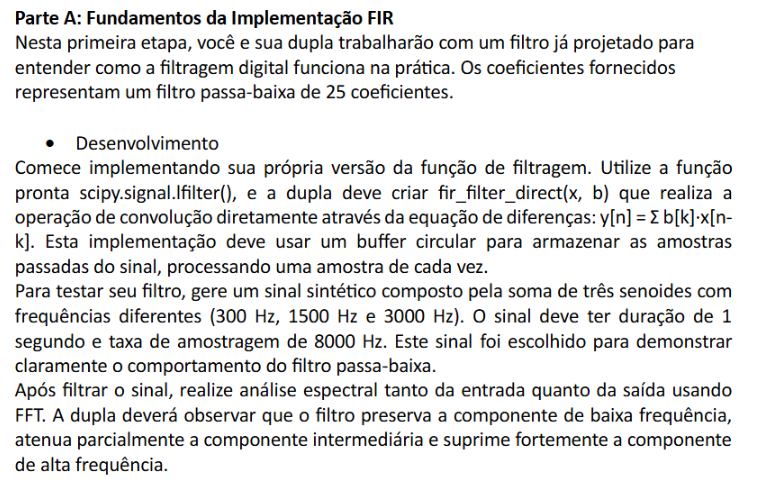

Coeficientes do filtro FIR:
[ 7.78387868e-19  1.95452848e-03  4.50096149e-03  5.36157282e-03
 -3.01625299e-18 -1.35134336e-02 -2.86020868e-02 -2.96205439e-02
  7.49198323e-18  6.48141997e-02  1.49107713e-01  2.21196941e-01
  2.49600294e-01  2.21196941e-01  1.49107713e-01  6.48141997e-02
  7.49198323e-18 -2.96205439e-02 -2.86020868e-02 -1.35134336e-02
 -3.01625299e-18  5.36157282e-03  4.50096149e-03  1.95452848e-03
  7.78387868e-19]

Número de coeficientes: 25

Realizando análise espectral...


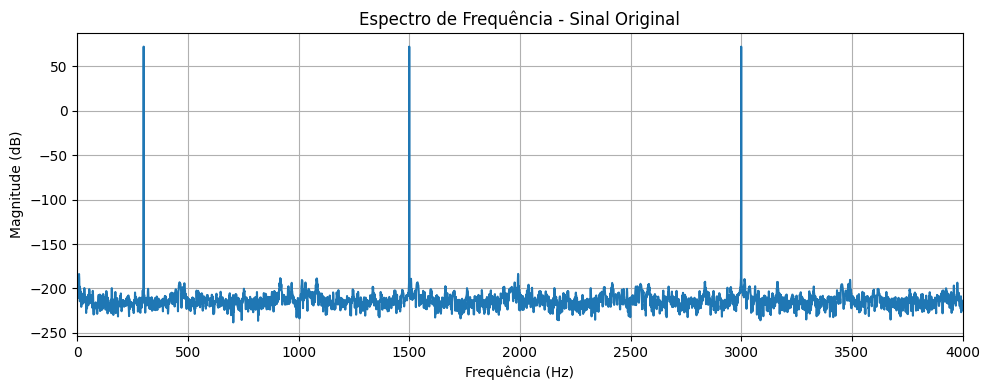

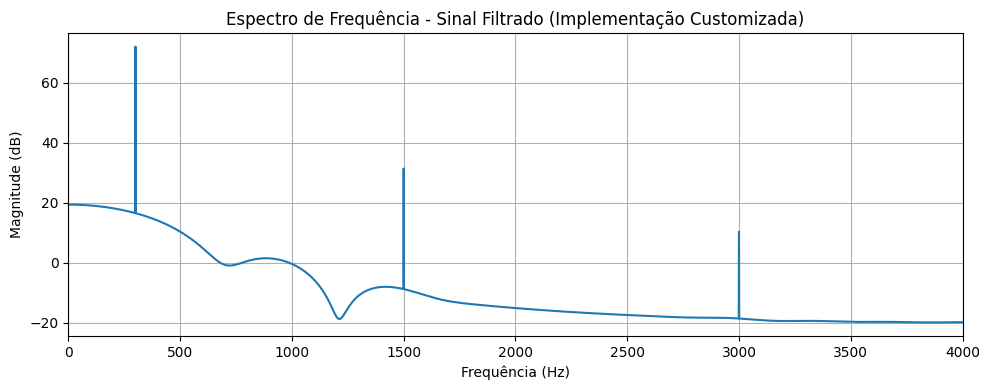

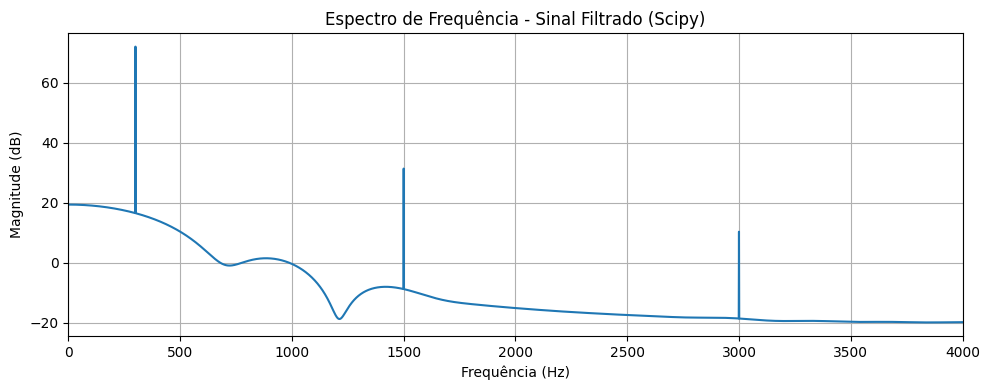

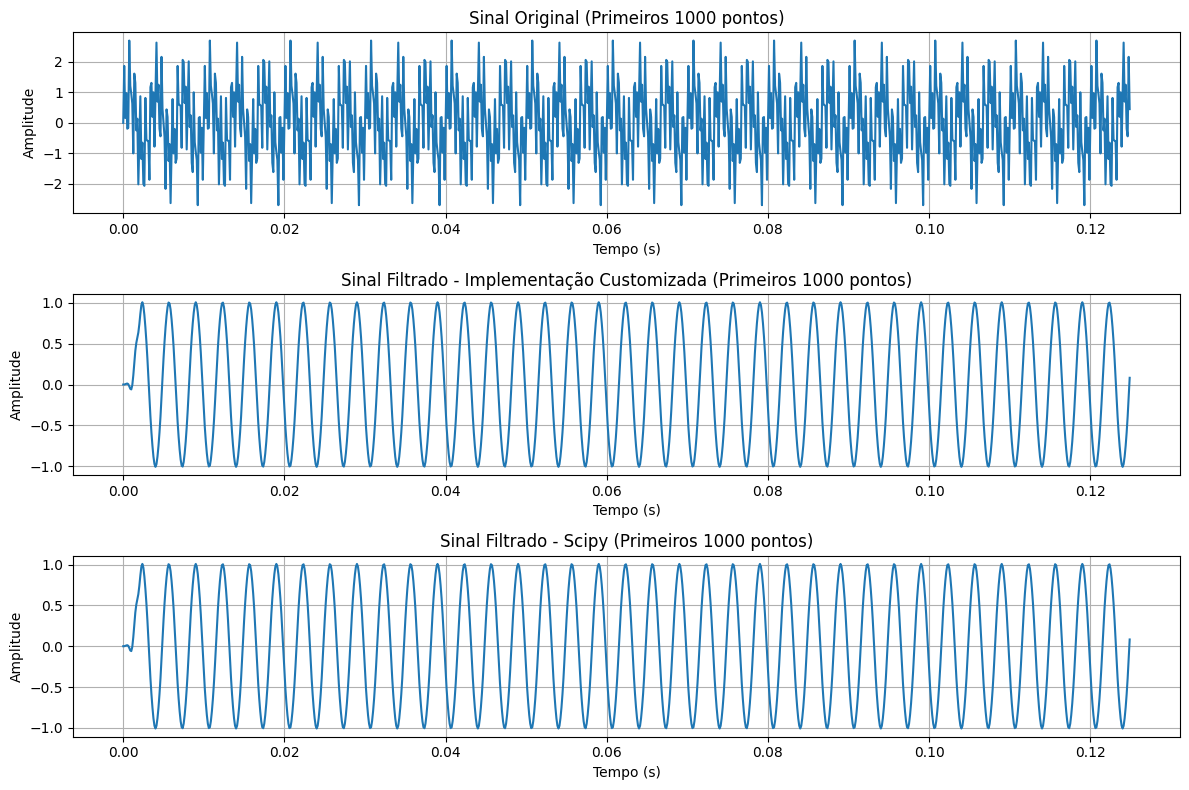


Erro máximo entre as implementações: 1.11e-15

Análise do comportamento do filtro:
Frequência 300 Hz (baixa): Deve ser preservada
Frequência 1500 Hz (intermediária): Deve ser atenuada parcialmente
Frequência 3000 Hz (alta): Deve ser suprimida fortemente


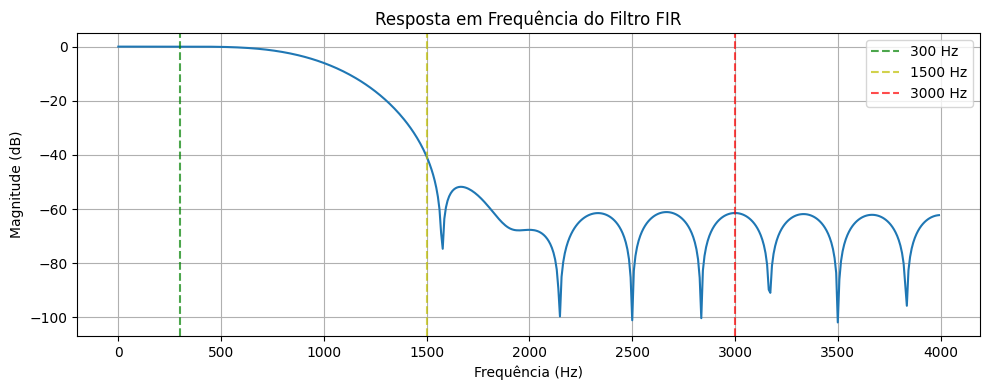

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

def fir_filter_direct(x, b):
    """
    Implementação do filtro FIR usando buffer circular
    y[n] = Σ b[k] * x[n-k]

    Parâmetros:
    x: sinal de entrada
    b: coeficientes do filtro FIR

    Retorna:
    y: sinal filtrado
    """
    N = len(b)  # Número de coeficientes
    y = np.zeros(len(x))

    # Buffer circular para armazenar as amostras passadas
    buffer = np.zeros(N)
    buffer_ptr = 0  # Ponteiro do buffer circular

    for n in range(len(x)):
        # Atualiza o buffer circular com a nova amostra
        buffer[buffer_ptr] = x[n]

        # Calcula a saída usando a equação de diferenças
        y[n] = 0
        for k in range(N):
            # Índice circular para acessar o buffer
            idx = (buffer_ptr - k) % N
            y[n] += b[k] * buffer[idx]

        # Atualiza o ponteiro do buffer (movimento circular)
        buffer_ptr = (buffer_ptr + 1) % N

    return y

def analise_espectral(sinal, fs, titulo):
    """
    Realiza análise espectral do sinal usando FFT
    """
    N = len(sinal)
    # Calcula a FFT
    fft_result = np.fft.fft(sinal)
    fft_freq = np.fft.fftfreq(N, 1/fs)

    # Calcula a magnitude em dB
    magnitude = np.abs(fft_result)
    magnitude_dB = 20 * np.log10(magnitude + 1e-12)  # +1e-12 para evitar log(0)

    # Plota apenas a parte positiva do espectro
    positive_freq = fft_freq[:N//2]
    positive_magnitude = magnitude_dB[:N//2]

    plt.figure(figsize=(10, 4))
    plt.plot(positive_freq, positive_magnitude)
    plt.title(f'Espectro de Frequência - {titulo}')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim(0, fs/2)
    plt.tight_layout()
    plt.show()

    return positive_freq, positive_magnitude

# Coeficientes do filtro passa-baixa (exemplo - filtro com frequência de corte ~1000 Hz)
# Na prática, você deve usar os coeficientes fornecidos na atividade
b = signal.firwin(25, 1000, fs=8000, pass_zero='lowpass')

# Parâmetros do sinal
fs = 8000  # Frequência de amostragem (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de sinal

# Frequências das senoides
f1 = 300   # Baixa frequência (deve ser preservada)
f2 = 1500  # Frequência intermediária (deve ser atenuada)
f3 = 3000  # Alta frequência (deve ser suprimida)

# Gera o sinal sintético
x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f2 * t)
x3 = np.sin(2 * np.pi * f3 * t)
x = x1 + x2 + x3  # Sinal composto

print("Coeficientes do filtro FIR:")
print(b)
print(f"\nNúmero de coeficientes: {len(b)}")

# Aplica o filtro usando nossa implementação
y_custom = fir_filter_direct(x, b)

# Aplica o filtro usando scipy.signal.lfilter para comparação
y_scipy = signal.lfilter(b, 1, x)

# Análise espectral
print("\nRealizando análise espectral...")

# Espectro do sinal original
freq_orig, mag_orig = analise_espectral(x, fs, "Sinal Original")

# Espectro do sinal filtrado (nossa implementação)
freq_filt, mag_filt = analise_espectral(y_custom, fs, "Sinal Filtrado (Implementação Customizada)")

# Espectro do sinal filtrado (scipy)
freq_scipy, mag_scipy = analise_espectral(y_scipy, fs, "Sinal Filtrado (Scipy)")

# Plota os sinais no domínio do tempo
plt.figure(figsize=(12, 8))

# Sinal original
plt.subplot(3, 1, 1)
plt.plot(t[:1000], x[:1000])  # Mostra apenas os primeiros 1000 pontos
plt.title('Sinal Original (Primeiros 1000 pontos)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Sinal filtrado (nossa implementação)
plt.subplot(3, 1, 2)
plt.plot(t[:1000], y_custom[:1000])
plt.title('Sinal Filtrado - Implementação Customizada (Primeiros 1000 pontos)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Sinal filtrado (scipy)
plt.subplot(3, 1, 3)
plt.plot(t[:1000], y_scipy[:1000])
plt.title('Sinal Filtrado - Scipy (Primeiros 1000 pontos)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparação entre as implementações
erro = np.max(np.abs(y_custom - y_scipy))
print(f"\nErro máximo entre as implementações: {erro:.2e}")

# Análise do comportamento do filtro nas frequências específicas
print("\nAnálise do comportamento do filtro:")
print(f"Frequência {f1} Hz (baixa): Deve ser preservada")
print(f"Frequência {f2} Hz (intermediária): Deve ser atenuada parcialmente")
print(f"Frequência {f3} Hz (alta): Deve ser suprimida fortemente")

# Verifica a resposta em frequência do filtro
w, h = signal.freqz(b, fs=fs)
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('Resposta em Frequência do Filtro FIR')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.axvline(f1, color='g', linestyle='--', alpha=0.7, label=f'{f1} Hz')
plt.axvline(f2, color='y', linestyle='--', alpha=0.7, label=f'{f2} Hz')
plt.axvline(f3, color='r', linestyle='--', alpha=0.7, label=f'{f3} Hz')
plt.legend()
plt.tight_layout()
plt.show()

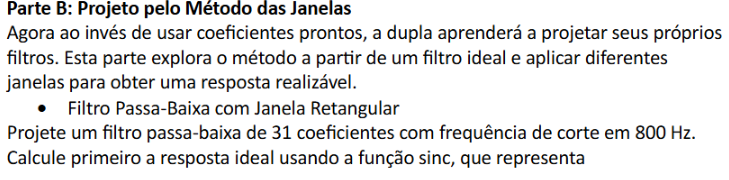
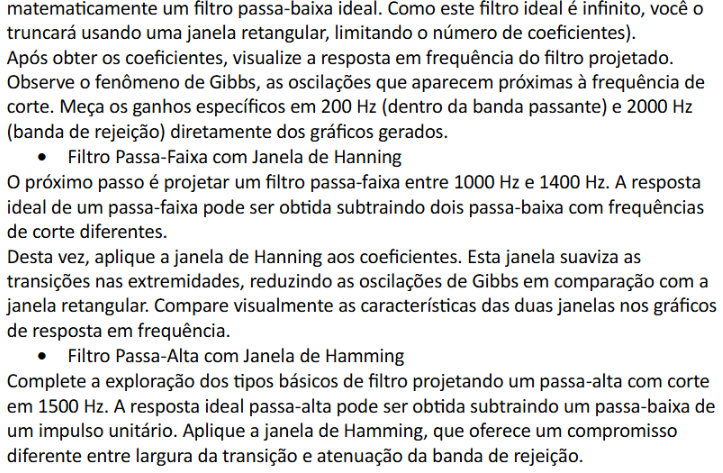

=== FILTRO PASSA-BAIXA - JANELA RETANGULAR ===
Ordem do filtro: 31
Frequência de corte: 800 Hz
Frequência de amostragem: 8000 Hz

Medições de ganho:
200 Hz (banda passante): -0.45 dB, 0.9494 linear
2000 Hz (banda de rejeição): -58.21 dB, 0.0012 linear


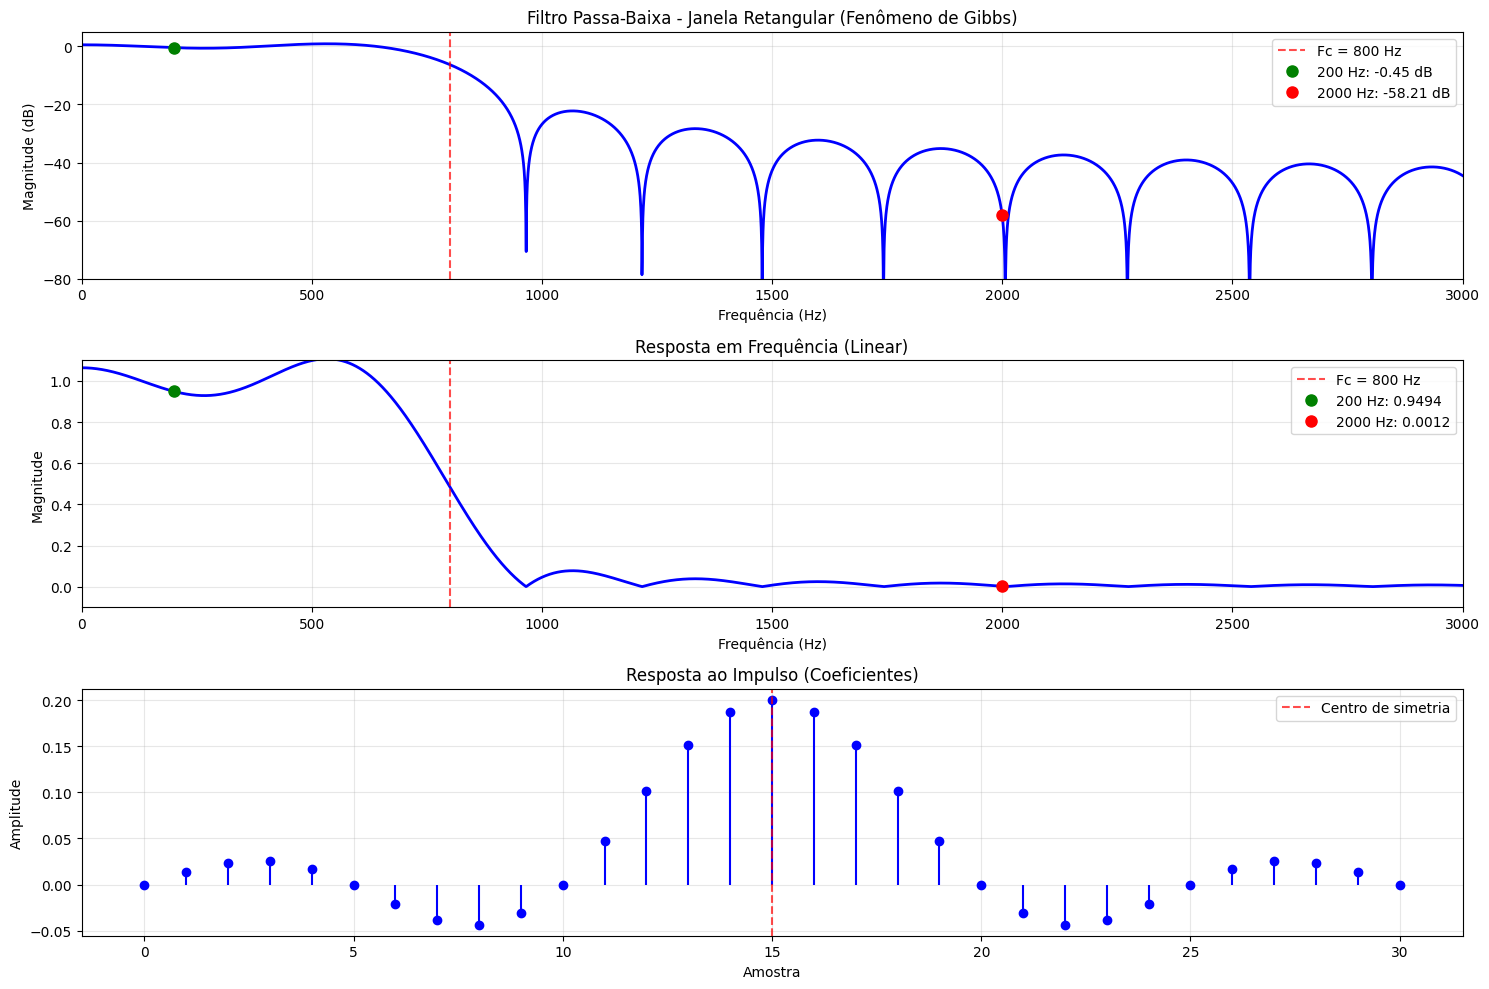


=== FILTRO PASSA-FAIXA - JANELA HANNING ===
Ordem do filtro: 31
Banda passante: 1000-1400 Hz
Frequência de amostragem: 8000 Hz


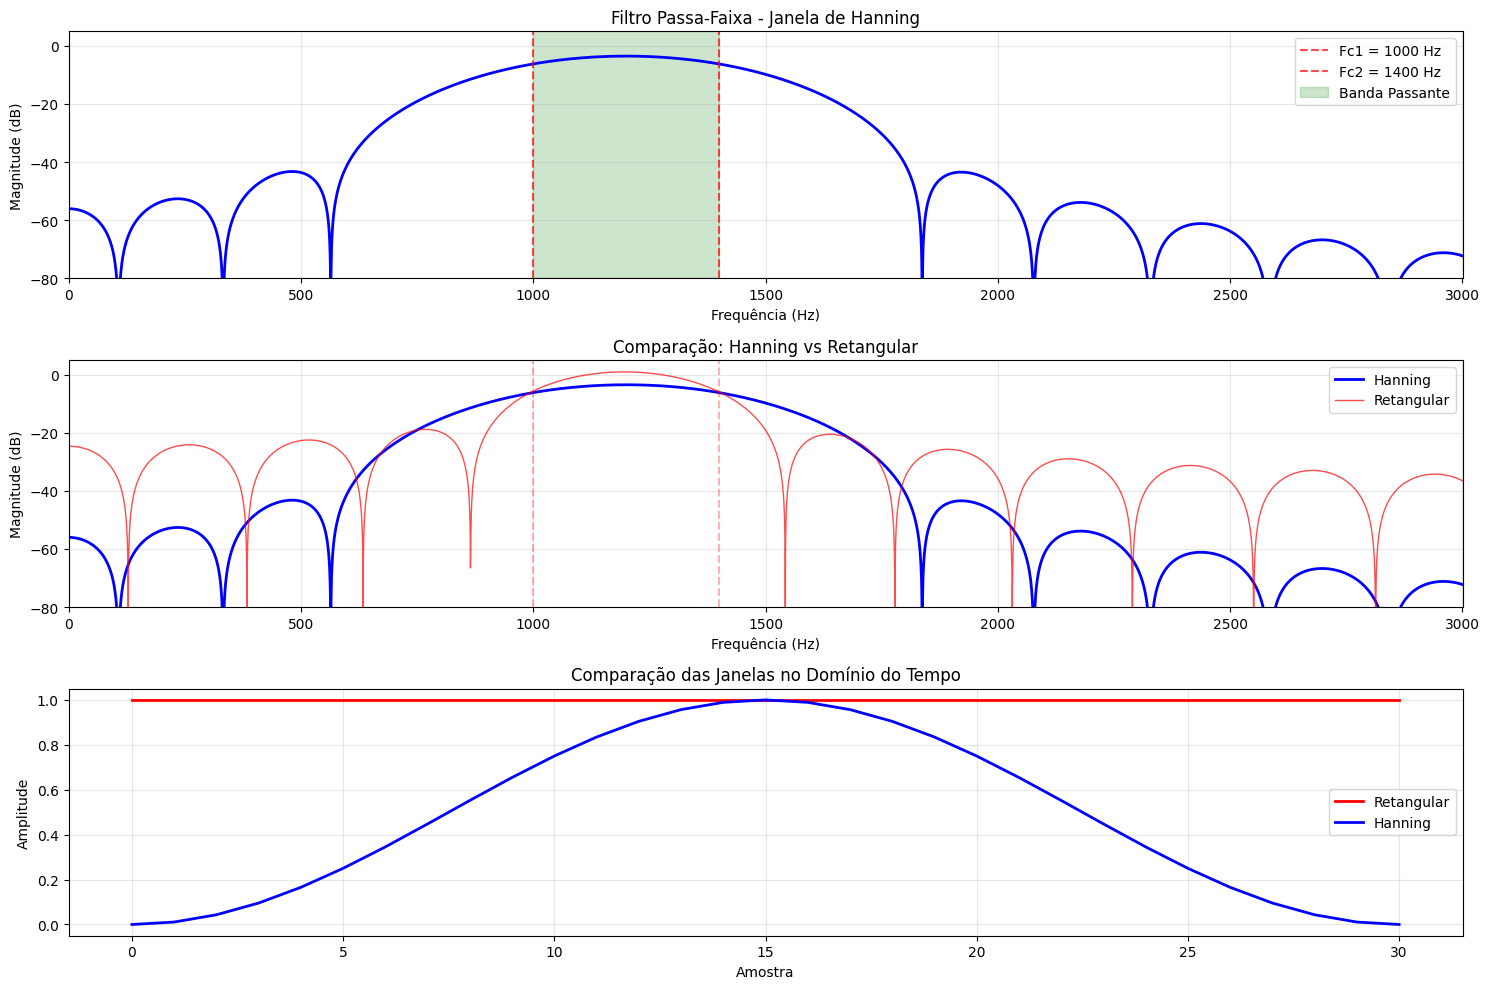


=== FILTRO PASSA-ALTA - JANELA HAMMING ===
Ordem do filtro: 31
Frequência de corte: 1500 Hz
Frequência de amostragem: 8000 Hz


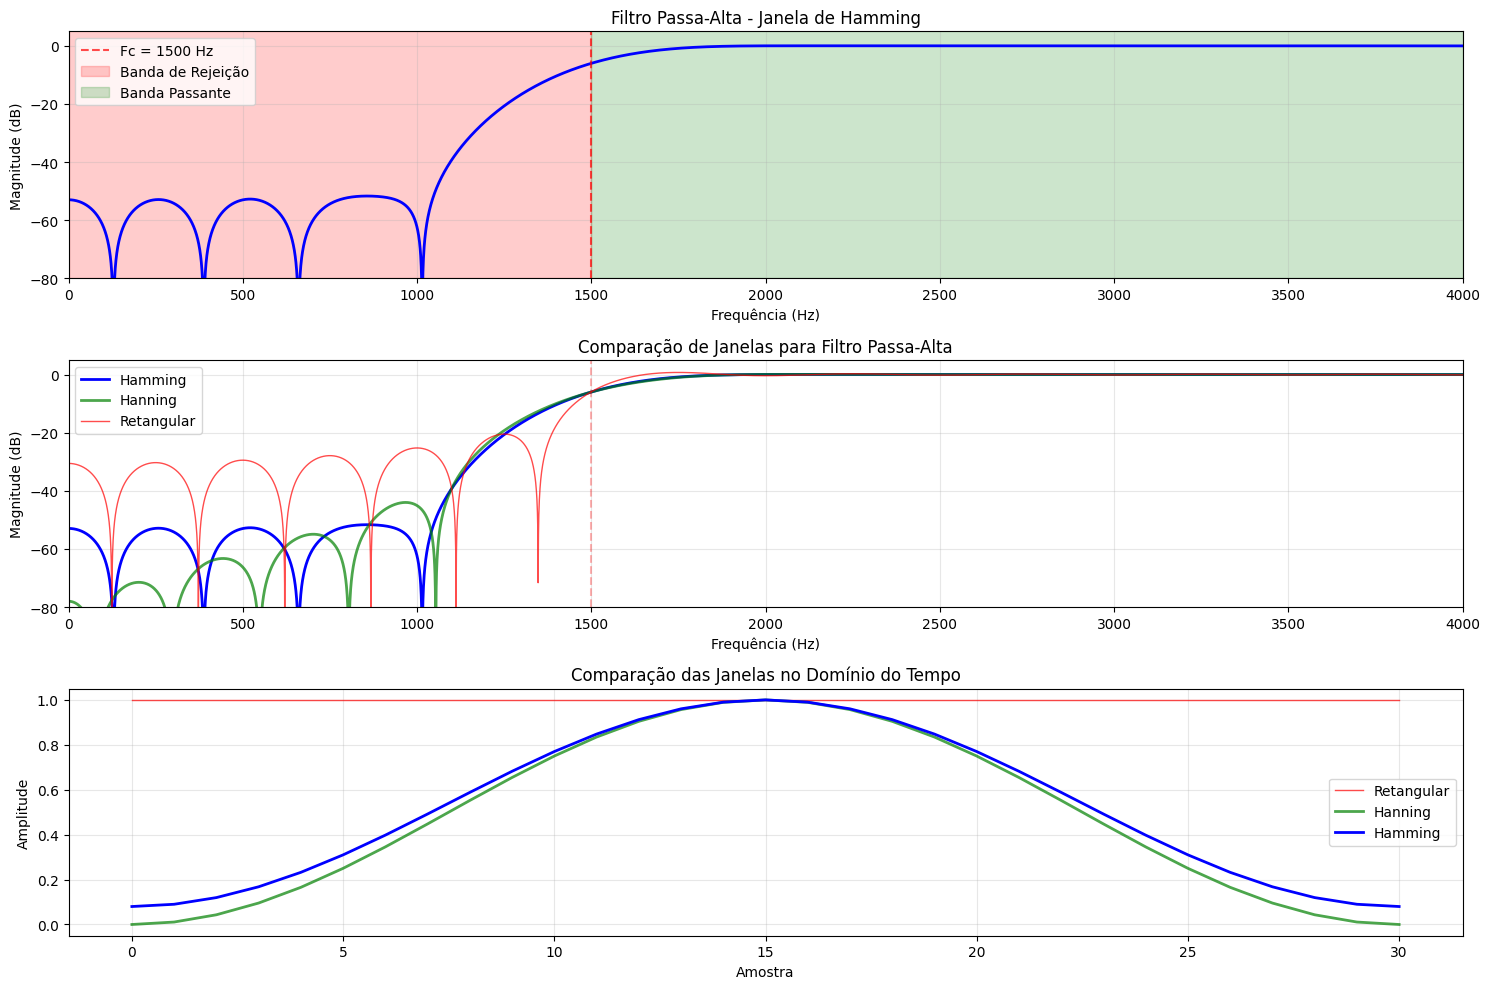


ANÁLISE COMPARATIVA DAS JANELAS


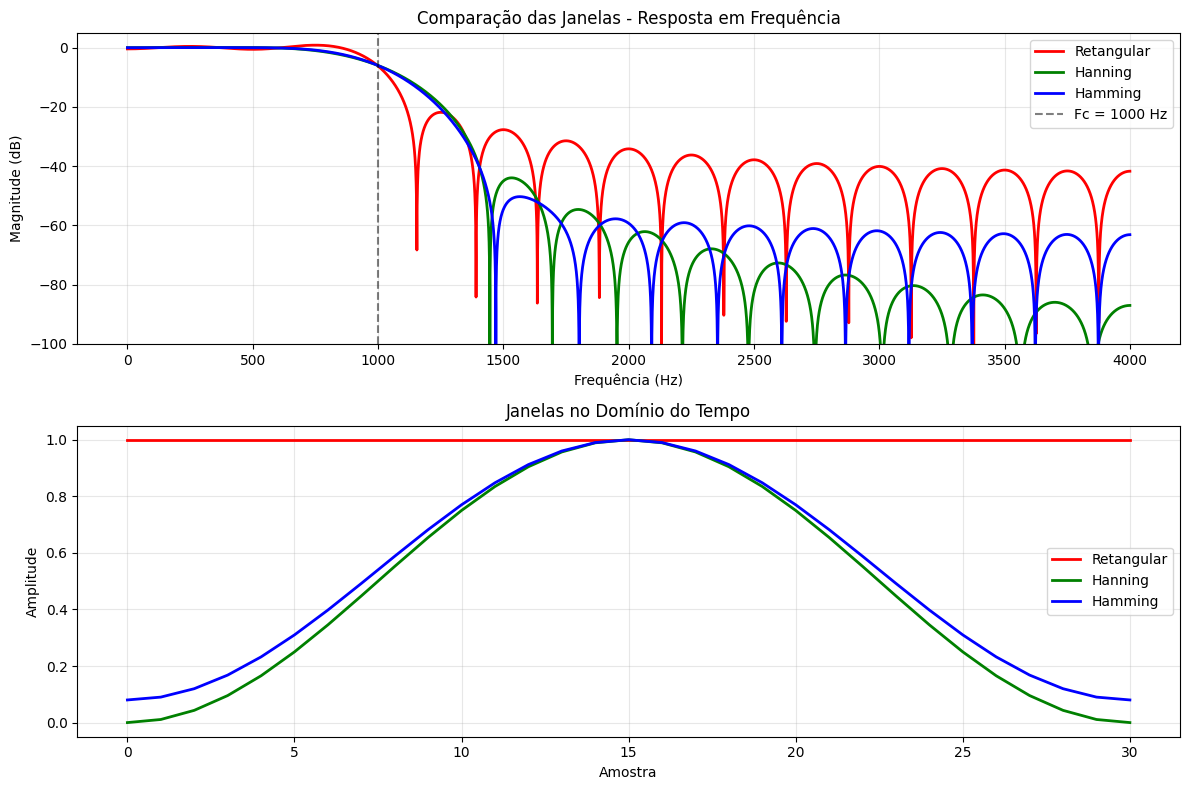


CARACTERÍSTICAS DAS JANELAS:
Retangular: Largura de lóbulo principal mais estreita, mas lóbulos secundários altos (Gibbs)
Hanning: Lóbulos secundários mais baixos, melhor atenuação na stopband
Hamming: Compromisso entre largura do lóbulo principal e altura dos lóbulos secundários

=== RESUMO DOS PROJETOS ===
1. Passa-Baixa (Retangular): Demonstra fenômeno de Gibbs
2. Passa-Faixa (Hanning): Reduz oscilações de Gibbs
3. Passa-Alta (Hamming): Compromisso entre transição e atenuação


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

def janela_retangular(M):
    """Retorna uma janela retangular de comprimento M"""
    return np.ones(M)

def janela_hann(M):
    """Retorna uma janela de Hanning de comprimento M"""
    return np.hanning(M)

def janela_hamming(M):
    """Retorna uma janela de Hamming de comprimento M"""
    return np.hamming(M)

def filtro_passa_baixa_ideal(fc, fs, M):
    """
    Calcula a resposta ao impulso de um filtro passa-baixa ideal
    fc: frequência de corte (Hz)
    fs: frequência de amostragem (Hz)
    M: número de coeficientes (deve ser ímpar)
    """
    if M % 2 == 0:
        M += 1  # Garante que M seja ímpar

    n = np.arange(M)
    alpha = (M - 1) / 2  # Atraso de grupo

    # Resposta ideal (função sinc)
    h_ideal = 2 * (fc / fs) * np.sinc(2 * (fc / fs) * (n - alpha))

    return h_ideal, alpha

def filtro_passa_faixa_ideal(fc1, fc2, fs, M):
    """
    Calcula a resposta ao impulso de um filtro passa-faixa ideal
    fc1: frequência de corte inferior (Hz)
    fc2: frequência de corte superior (Hz)
    fs: frequência de amostragem (Hz)
    M: número de coeficientes
    """
    # Passa-faixa = passa-baixa alta - passa-baixa baixa
    h_low1, alpha = filtro_passa_baixa_ideal(fc1, fs, M)
    h_low2, _ = filtro_passa_baixa_ideal(fc2, fs, M)

    h_ideal = h_low2 - h_low1

    return h_ideal, alpha

def filtro_passa_alta_ideal(fc, fs, M):
    """
    Calcula a resposta ao impulso de um filtro passa-alta ideal
    fc: frequência de corte (Hz)
    fs: frequência de amostragem (Hz)
    M: número de coeficientes
    """
    # Passa-alta = impulso - passa-baixa
    h_low, alpha = filtro_passa_baixa_ideal(fc, fs, M)

    # Impulso unitário centralizado
    delta = np.zeros(M)
    delta[int(alpha)] = 1

    h_ideal = delta - h_low

    return h_ideal, alpha

def projeto_filtro_passa_baixa_retangular():
    """Projeto do filtro passa-baixa com janela retangular"""
    print("=== FILTRO PASSA-BAIXA - JANELA RETANGULAR ===")

    # Especificações
    M = 31          # Número de coeficientes
    fc = 800        # Frequência de corte (Hz)
    fs = 8000       # Frequência de amostragem (Hz)

    print(f"Ordem do filtro: {M}")
    print(f"Frequência de corte: {fc} Hz")
    print(f"Frequência de amostragem: {fs} Hz")

    # Resposta ideal
    h_ideal, alpha = filtro_passa_baixa_ideal(fc, fs, M)

    # Janela retangular
    window = janela_retangular(M)

    # Aplicar janela
    h_final = h_ideal * window

    # Resposta em frequência
    w, h_freq = signal.freqz(h_final, 1, worN=8000, fs=fs)

    # Calcular magnitude em dB e linear
    h_mag_db = 20 * np.log10(np.abs(h_freq))
    h_mag_linear = np.abs(h_freq)

    # Medir ganhos em frequências específicas
    freq_medir = [200, 2000]  # Hz
    ganhos_db = []
    ganhos_linear = []

    for f in freq_medir:
        idx = np.argmin(np.abs(w - f))
        ganhos_db.append(h_mag_db[idx])
        ganhos_linear.append(h_mag_linear[idx])

    print(f"\nMedições de ganho:")
    print(f"200 Hz (banda passante): {ganhos_db[0]:.2f} dB, {ganhos_linear[0]:.4f} linear")
    print(f"2000 Hz (banda de rejeição): {ganhos_db[1]:.2f} dB, {ganhos_linear[1]:.4f} linear")

    # Plot
    plt.figure(figsize=(15, 10))

    # Resposta em frequência (dB)
    plt.subplot(3, 1, 1)
    plt.plot(w, h_mag_db, 'b-', linewidth=2)
    plt.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'Fc = {fc} Hz')

    # Marcar pontos de medição
    plt.plot(freq_medir[0], ganhos_db[0], 'go', markersize=8, label=f'200 Hz: {ganhos_db[0]:.2f} dB')
    plt.plot(freq_medir[1], ganhos_db[1], 'ro', markersize=8, label=f'2000 Hz: {ganhos_db[1]:.2f} dB')

    plt.title('Filtro Passa-Baixa - Janela Retangular (Fenômeno de Gibbs)')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 3000)

    # Resposta em frequência (linear)
    plt.subplot(3, 1, 2)
    plt.plot(w, h_mag_linear, 'b-', linewidth=2)
    plt.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'Fc = {fc} Hz')
    plt.plot(freq_medir[0], ganhos_linear[0], 'go', markersize=8, label=f'200 Hz: {ganhos_linear[0]:.4f}')
    plt.plot(freq_medir[1], ganhos_linear[1], 'ro', markersize=8, label=f'2000 Hz: {ganhos_linear[1]:.4f}')
    plt.title('Resposta em Frequência (Linear)')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-0.1, 1.1)
    plt.xlim(0, 3000)

    # Resposta ao impulso
    plt.subplot(3, 1, 3)
    n = np.arange(M)
    plt.stem(n, h_final, basefmt=" ", linefmt='blue', markerfmt='bo')
    plt.axvline(alpha, color='red', linestyle='--', alpha=0.7, label='Centro de simetria')
    plt.title('Resposta ao Impulso (Coeficientes)')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    return h_final, h_mag_db, h_mag_linear

def projeto_filtro_passa_faixa_hann():
    """Projeto do filtro passa-faixa com janela de Hanning"""
    print("\n=== FILTRO PASSA-FAIXA - JANELA HANNING ===")

    # Especificações
    M = 31          # Número de coeficientes
    fc1 = 1000      # Frequência de corte inferior (Hz)
    fc2 = 1400      # Frequência de corte superior (Hz)
    fs = 8000       # Frequência de amostragem (Hz)

    print(f"Ordem do filtro: {M}")
    print(f"Banda passante: {fc1}-{fc2} Hz")
    print(f"Frequência de amostragem: {fs} Hz")

    # Resposta ideal
    h_ideal, alpha = filtro_passa_faixa_ideal(fc1, fc2, fs, M)

    # Janela de Hanning
    window = janela_hann(M)

    # Aplicar janela
    h_final = h_ideal * window

    # Resposta em frequência
    w, h_freq = signal.freqz(h_final, 1, worN=8000, fs=fs)
    h_mag_db = 20 * np.log10(np.abs(h_freq))

    # Plot
    plt.figure(figsize=(15, 10))

    # Resposta em frequência
    plt.subplot(3, 1, 1)
    plt.plot(w, h_mag_db, 'b-', linewidth=2)
    plt.axvline(fc1, color='r', linestyle='--', alpha=0.7, label=f'Fc1 = {fc1} Hz')
    plt.axvline(fc2, color='r', linestyle='--', alpha=0.7, label=f'Fc2 = {fc2} Hz')

    # Destacar banda passante
    plt.axvspan(fc1, fc2, alpha=0.2, color='green', label='Banda Passante')

    plt.title('Filtro Passa-Faixa - Janela de Hanning')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 3000)

    # Comparação com janela retangular
    plt.subplot(3, 1, 2)
    h_retangular = h_ideal * janela_retangular(M)
    w_ret, h_freq_ret = signal.freqz(h_retangular, 1, worN=8000, fs=fs)
    h_mag_db_ret = 20 * np.log10(np.abs(h_freq_ret))

    plt.plot(w, h_mag_db, 'b-', linewidth=2, label='Hanning')
    plt.plot(w_ret, h_mag_db_ret, 'r-', linewidth=1, alpha=0.7, label='Retangular')
    plt.axvline(fc1, color='r', linestyle='--', alpha=0.3)
    plt.axvline(fc2, color='r', linestyle='--', alpha=0.3)
    plt.title('Comparação: Hanning vs Retangular')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 3000)

    # Janelas no tempo
    plt.subplot(3, 1, 3)
    n = np.arange(M)
    plt.plot(n, janela_retangular(M), 'r-', linewidth=2, label='Retangular')
    plt.plot(n, janela_hann(M), 'b-', linewidth=2, label='Hanning')
    plt.title('Comparação das Janelas no Domínio do Tempo')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    return h_final, h_mag_db

def projeto_filtro_passa_alta_hamming():
    """Projeto do filtro passa-alta com janela de Hamming"""
    print("\n=== FILTRO PASSA-ALTA - JANELA HAMMING ===")

    # Especificações
    M = 31          # Número de coeficientes
    fc = 1500       # Frequência de corte (Hz)
    fs = 8000       # Frequência de amostragem (Hz)

    print(f"Ordem do filtro: {M}")
    print(f"Frequência de corte: {fc} Hz")
    print(f"Frequência de amostragem: {fs} Hz")

    # Resposta ideal
    h_ideal, alpha = filtro_passa_alta_ideal(fc, fs, M)

    # Janela de Hamming
    window = janela_hamming(M)

    # Aplicar janela
    h_final = h_ideal * window

    # Resposta em frequência
    w, h_freq = signal.freqz(h_final, 1, worN=8000, fs=fs)
    h_mag_db = 20 * np.log10(np.abs(h_freq))

    # Plot
    plt.figure(figsize=(15, 10))

    # Resposta em frequência
    plt.subplot(3, 1, 1)
    plt.plot(w, h_mag_db, 'b-', linewidth=2)
    plt.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'Fc = {fc} Hz')

    # Destacar bandas
    plt.axvspan(0, fc, alpha=0.2, color='red', label='Banda de Rejeição')
    plt.axvspan(fc, 4000, alpha=0.2, color='green', label='Banda Passante')

    plt.title('Filtro Passa-Alta - Janela de Hamming')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 4000)

    # Comparação com outras janelas
    plt.subplot(3, 1, 2)
    h_hann = h_ideal * janela_hann(M)
    h_ret = h_ideal * janela_retangular(M)

    w_hann, h_freq_hann = signal.freqz(h_hann, 1, worN=8000, fs=fs)
    w_ret, h_freq_ret = signal.freqz(h_ret, 1, worN=8000, fs=fs)

    h_mag_db_hann = 20 * np.log10(np.abs(h_freq_hann))
    h_mag_db_ret = 20 * np.log10(np.abs(h_freq_ret))

    plt.plot(w, h_mag_db, 'b-', linewidth=2, label='Hamming')
    plt.plot(w_hann, h_mag_db_hann, 'g-', linewidth=2, alpha=0.7, label='Hanning')
    plt.plot(w_ret, h_mag_db_ret, 'r-', linewidth=1, alpha=0.7, label='Retangular')
    plt.axvline(fc, color='r', linestyle='--', alpha=0.3)
    plt.title('Comparação de Janelas para Filtro Passa-Alta')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 4000)

    # Janelas no tempo
    plt.subplot(3, 1, 3)
    n = np.arange(M)
    plt.plot(n, janela_retangular(M), 'r-', linewidth=1, alpha=0.7, label='Retangular')
    plt.plot(n, janela_hann(M), 'g-', linewidth=2, alpha=0.7, label='Hanning')
    plt.plot(n, janela_hamming(M), 'b-', linewidth=2, label='Hamming')
    plt.title('Comparação das Janelas no Domínio do Tempo')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    return h_final, h_mag_db

def analise_comparativa_janelas():
    """Análise comparativa das características das janelas"""
    print("\n" + "="*60)
    print("ANÁLISE COMPARATIVA DAS JANELAS")
    print("="*60)

    M = 31
    fs = 8000

    # Criar um filtro passa-baixa com diferentes janelas
    fc = 1000
    h_ideal, _ = filtro_passa_baixa_ideal(fc, fs, M)

    # Aplicar diferentes janelas
    h_ret = h_ideal * janela_retangular(M)
    h_hann = h_ideal * janela_hann(M)
    h_hamm = h_ideal * janela_hamming(M)

    # Calcular respostas
    w, h_ret_freq = signal.freqz(h_ret, 1, worN=8000, fs=fs)
    _, h_hann_freq = signal.freqz(h_hann, 1, worN=8000, fs=fs)
    _, h_hamm_freq = signal.freqz(h_hamm, 1, worN=8000, fs=fs)

    h_ret_db = 20 * np.log10(np.abs(h_ret_freq))
    h_hann_db = 20 * np.log10(np.abs(h_hann_freq))
    h_hamm_db = 20 * np.log10(np.abs(h_hamm_freq))

    # Plot comparativo
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(w, h_ret_db, 'r-', label='Retangular', linewidth=2)
    plt.plot(w, h_hann_db, 'g-', label='Hanning', linewidth=2)
    plt.plot(w, h_hamm_db, 'b-', label='Hamming', linewidth=2)
    plt.axvline(fc, color='k', linestyle='--', alpha=0.5, label=f'Fc = {fc} Hz')
    plt.title('Comparação das Janelas - Resposta em Frequência')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-100, 5)

    plt.subplot(2, 1, 2)
    n = np.arange(M)
    plt.plot(n, janela_retangular(M), 'r-', label='Retangular', linewidth=2)
    plt.plot(n, janela_hann(M), 'g-', label='Hanning', linewidth=2)
    plt.plot(n, janela_hamming(M), 'b-', label='Hamming', linewidth=2)
    plt.title('Janelas no Domínio do Tempo')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Características das janelas
    print("\nCARACTERÍSTICAS DAS JANELAS:")
    print("Retangular: Largura de lóbulo principal mais estreita, mas lóbulos secundários altos (Gibbs)")
    print("Hanning: Lóbulos secundários mais baixos, melhor atenuação na stopband")
    print("Hamming: Compromisso entre largura do lóbulo principal e altura dos lóbulos secundários")

# Executar todos os projetos
if __name__ == "__main__":
    # Projeto dos três filtros
    h_pb_ret, mag_pb_db, mag_pb_lin = projeto_filtro_passa_baixa_retangular()
    h_pf_hann, mag_pf_db = projeto_filtro_passa_faixa_hann()
    h_pa_hamm, mag_pa_db = projeto_filtro_passa_alta_hamming()

    # Análise comparativa
    analise_comparativa_janelas()

    print("\n=== RESUMO DOS PROJETOS ===")
    print("1. Passa-Baixa (Retangular): Demonstra fenômeno de Gibbs")
    print("2. Passa-Faixa (Hanning): Reduz oscilações de Gibbs")
    print("3. Passa-Alta (Hamming): Compromisso entre transição e atenuação")

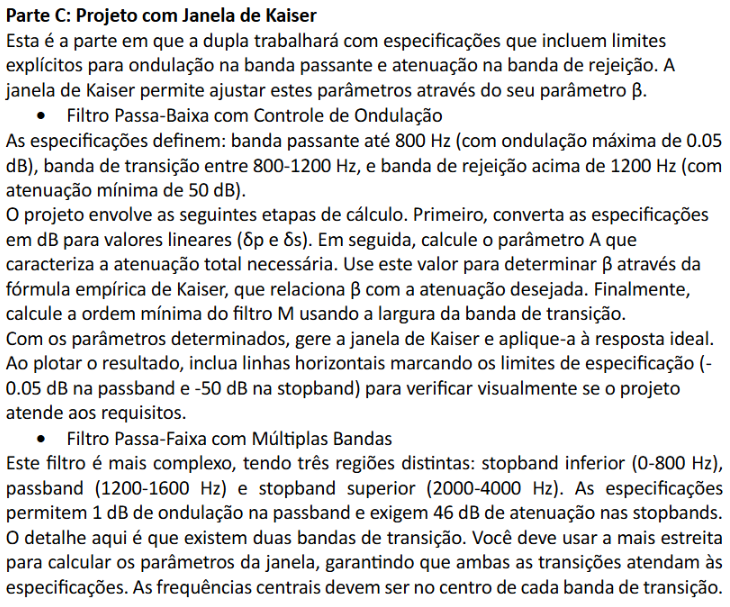

=== FILTRO PASSA-BAIXA ===
δp (linear): 1.005773
δs (linear): 0.003162
Parâmetro A: 50.00 dB
Parâmetro beta: 4.5335
Ordem do filtro M: 468063


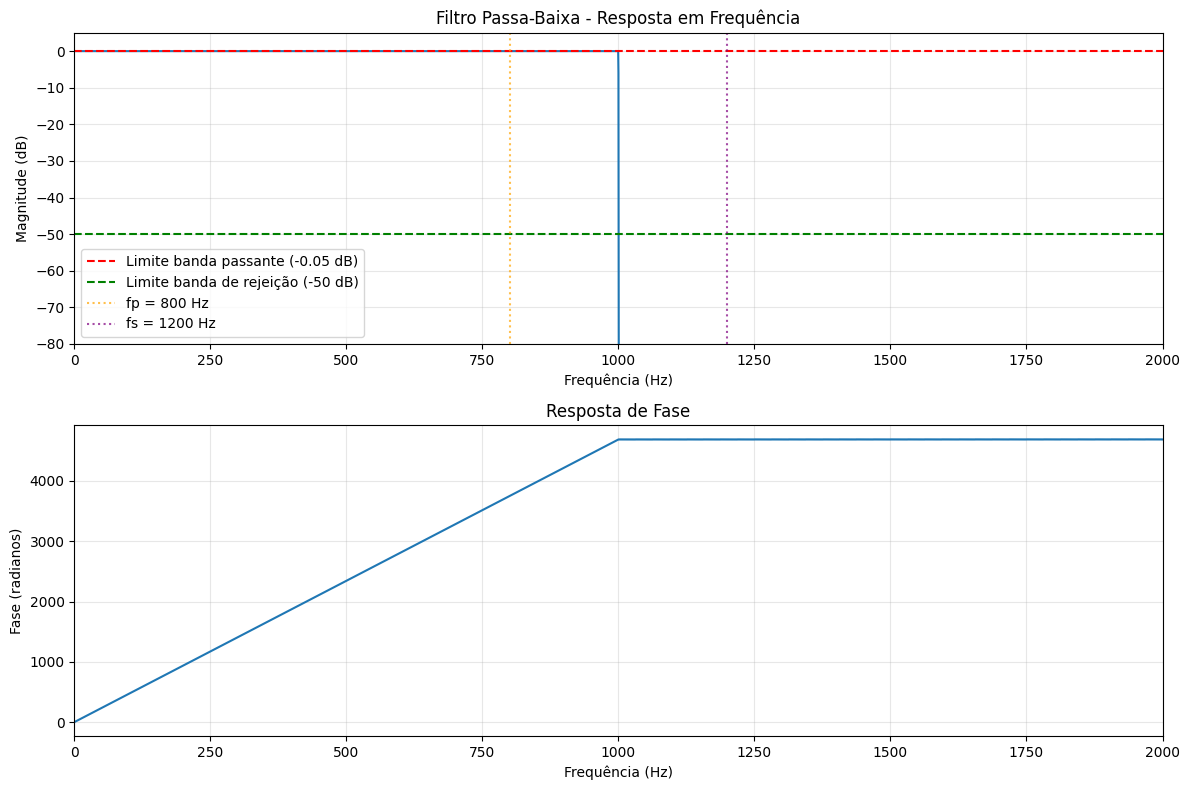


Verificação do Filtro Passa-Baixa:
Ondulação na banda passante: 0.000 dB (limite: 0.05 dB)
Atenuação na banda de rejeição: -261.241 dB (limite: -50 dB)

=== FILTRO PASSA-FAIXA ===
δp (linear): 1.122018
δs (linear): 0.005012
Banda de transição inferior: 0.0500
Banda de transição superior: 0.0500
Banda de transição usada: 0.0500
Parâmetro A: 46.00 dB
Parâmetro beta: 4.0886
Ordem do filtro M: 423485
Frequência de corte inferior: 1000.0 Hz
Frequência de corte superior: 1800.0 Hz


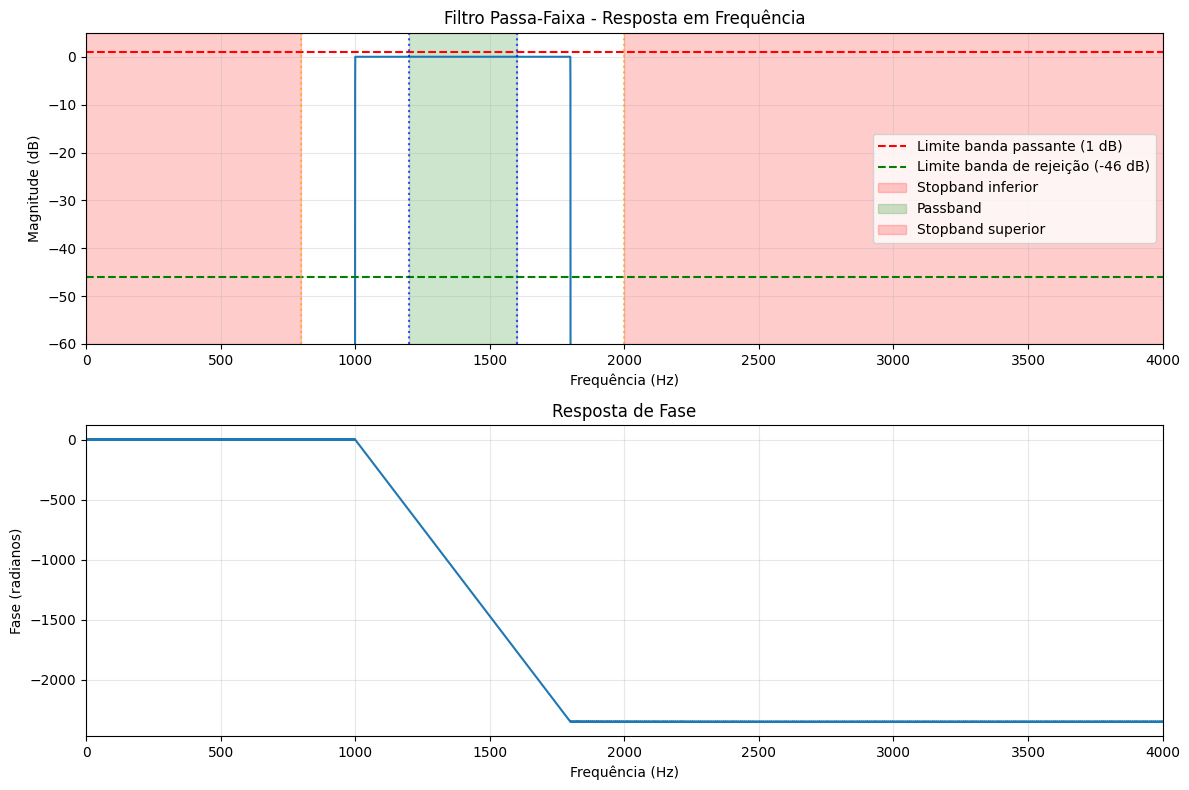


Verificação do Filtro Passa-Faixa:
Ondulação na banda passante: 0.000 dB (limite: 1 dB)
Atenuação na stopband inferior: -211.129 dB (limite: -46 dB)
Atenuação na stopband superior: -213.741 dB (limite: -46 dB)

=== RESUMO DOS PROJETOS ===
Filtro Passa-Baixa: M = 468063, beta = 4.5335
Filtro Passa-Faixa: M = 423485, beta = 4.0886


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.special import i0

def kaiser_window(M, beta):
    """Retorna a janela de Kaiser de comprimento M com parâmetro beta"""
    n = np.arange(M)
    alpha = (M - 1) / 2
    return i0(beta * np.sqrt(1 - ((n - alpha) / alpha)**2)) / i0(beta)

def linear_to_db(linear_value):
    """Converte valor linear para dB"""
    return 20 * np.log10(linear_value)

def db_to_linear(db_value):
    """Converte valor dB para linear"""
    return 10**(db_value / 20)

def kaiser_parameters(delta_p, delta_s, delta_f, fs):
    """
    Calcula os parâmetros de Kaiser
    delta_p: ondulação na banda passante (linear)
    delta_s: atenuação na banda de rejeição (linear)
    delta_f: largura da banda de transição (normalizada)
    fs: frequência de amostragem
    """
    # Parâmetro A (atenuação)
    A = -20 * np.log10(min(delta_p, delta_s))

    # Parâmetro beta
    if A > 50:
        beta = 0.1102 * (A - 8.7)
    elif A >= 21:
        beta = 0.5842 * (A - 21)**0.4 + 0.07886 * (A - 21)
    else:
        beta = 0.0

    # Ordem do filtro
    M = int(np.ceil((A - 8) / (2.285 * 2 * np.pi * delta_f / fs)))

    # Garantir que M seja ímpar para filtros tipo I
    if M % 2 == 0:
        M += 1

    return M, beta, A

def projeto_filtro_passa_baixa():
    """Projeto do filtro passa-baixa com janela de Kaiser"""
    print("=== FILTRO PASSA-BAIXA ===")

    # Especificações
    fp = 800    # Frequência da banda passante (Hz)
    fs_stop = 1200  # Frequência da banda de rejeição (Hz)
    fs_sample = 8000  # Frequência de amostragem (Hz)

    # Conversão dB para linear
    delta_p_linear = db_to_linear(0.05)  # 0.05 dB para linear
    delta_s_linear = db_to_linear(-50)   # -50 dB para linear

    print(f"δp (linear): {delta_p_linear:.6f}")
    print(f"δs (linear): {delta_s_linear:.6f}")

    # Largura da banda de transição (normalizada)
    delta_f = (fs_stop - fp) / fs_sample

    # Cálculo dos parâmetros de Kaiser
    M, beta, A = kaiser_parameters(delta_p_linear, delta_s_linear, delta_f, fs_sample)

    print(f"Parâmetro A: {A:.2f} dB")
    print(f"Parâmetro beta: {beta:.4f}")
    print(f"Ordem do filtro M: {M}")

    # Frequência de corte (no meio da banda de transição)
    fc = (fp + fs_stop) / 2

    # Resposta ideal do filtro passa-baixa
    n = np.arange(M)
    h_ideal = 2 * (fc / fs_sample) * np.sinc(2 * (fc / fs_sample) * (n - (M - 1) / 2))

    # Aplicar janela de Kaiser
    window = kaiser_window(M, beta)
    h = h_ideal * window

    # Resposta em frequência
    w, h_freq = signal.freqz(h, 1, worN=8000, fs=fs_sample)

    # Plot
    plt.figure(figsize=(12, 8))

    # Magnitude em dB
    plt.subplot(2, 1, 1)
    h_db = 20 * np.log10(np.abs(h_freq))
    plt.plot(w, h_db)
    plt.axhline(-0.05, color='r', linestyle='--', label='Limite banda passante (-0.05 dB)')
    plt.axhline(-50, color='g', linestyle='--', label='Limite banda de rejeição (-50 dB)')
    plt.axvline(fp, color='orange', linestyle=':', alpha=0.7, label=f'fp = {fp} Hz')
    plt.axvline(fs_stop, color='purple', linestyle=':', alpha=0.7, label=f'fs = {fs_stop} Hz')
    plt.title('Filtro Passa-Baixa - Resposta em Frequência')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 2000)

    # Fase
    plt.subplot(2, 1, 2)
    angles = np.unwrap(np.angle(h_freq))
    plt.plot(w, angles)
    plt.title('Resposta de Fase')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Fase (radianos)')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 2000)

    plt.tight_layout()
    plt.show()

    return h, M, beta

def projeto_filtro_passa_faixa():
    """Projeto do filtro passa-faixa com janela de Kaiser"""
    print("\n=== FILTRO PASSA-FAIXA ===")

    # Especificações
    fs1 = 800    # Stopband inferior (Hz)
    fp1 = 1200   # Passband inferior (Hz)
    fp2 = 1600   # Passband superior (Hz)
    fs2 = 2000   # Stopband superior (Hz)
    fs_sample = 8000  # Frequência de amostragem (Hz)

    # Conversão dB para linear
    delta_p_linear = db_to_linear(1)    # 1 dB para linear
    delta_s_linear = db_to_linear(-46)  # -46 dB para linear

    print(f"δp (linear): {delta_p_linear:.6f}")
    print(f"δs (linear): {delta_s_linear:.6f}")

    # Usar a banda de transição mais estreita
    delta_f1 = (fp1 - fs1) / fs_sample  # Transição inferior
    delta_f2 = (fs2 - fp2) / fs_sample  # Transição superior
    delta_f = min(delta_f1, delta_f2)   # Usar a mais crítica

    print(f"Banda de transição inferior: {delta_f1:.4f}")
    print(f"Banda de transição superior: {delta_f2:.4f}")
    print(f"Banda de transição usada: {delta_f:.4f}")

    # Cálculo dos parâmetros de Kaiser
    M, beta, A = kaiser_parameters(delta_p_linear, delta_s_linear, delta_f, fs_sample)

    print(f"Parâmetro A: {A:.2f} dB")
    print(f"Parâmetro beta: {beta:.4f}")
    print(f"Ordem do filtro M: {M}")

    # Frequências de corte (no meio de cada banda de transição)
    fc1 = (fs1 + fp1) / 2  # Transição inferior
    fc2 = (fp2 + fs2) / 2  # Transição superior

    print(f"Frequência de corte inferior: {fc1:.1f} Hz")
    print(f"Frequência de corte superior: {fc2:.1f} Hz")

    # Resposta ideal do filtro passa-faixa
    n = np.arange(M)
    alpha = (M - 1) / 2

    # Filtro passa-baixa superior menos filtro passa-baixa inferior
    h_low = 2 * (fc1 / fs_sample) * np.sinc(2 * (fc1 / fs_sample) * (n - alpha))
    h_high = 2 * (fc2 / fs_sample) * np.sinc(2 * (fc2 / fs_sample) * (n - alpha))
    h_ideal = h_high - h_low

    # Aplicar janela de Kaiser
    window = kaiser_window(M, beta)
    h = h_ideal * window

    # Resposta em frequência
    w, h_freq = signal.freqz(h, 1, worN=8000, fs=fs_sample)

    # Plot
    plt.figure(figsize=(12, 8))

    # Magnitude em dB
    plt.subplot(2, 1, 1)
    h_db = 20 * np.log10(np.abs(h_freq))
    plt.plot(w, h_db)
    plt.axhline(1, color='r', linestyle='--', label='Limite banda passante (1 dB)')
    plt.axhline(-46, color='g', linestyle='--', label='Limite banda de rejeição (-46 dB)')

    # Marcar regiões
    plt.axvspan(0, fs1, alpha=0.2, color='red', label='Stopband inferior')
    plt.axvspan(fp1, fp2, alpha=0.2, color='green', label='Passband')
    plt.axvspan(fs2, 4000, alpha=0.2, color='red', label='Stopband superior')

    plt.axvline(fs1, color='orange', linestyle=':', alpha=0.7)
    plt.axvline(fp1, color='blue', linestyle=':', alpha=0.7)
    plt.axvline(fp2, color='blue', linestyle=':', alpha=0.7)
    plt.axvline(fs2, color='orange', linestyle=':', alpha=0.7)

    plt.title('Filtro Passa-Faixa - Resposta em Frequência')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-60, 5)
    plt.xlim(0, 4000)

    # Fase
    plt.subplot(2, 1, 2)
    angles = np.unwrap(np.angle(h_freq))
    plt.plot(w, angles)
    plt.title('Resposta de Fase')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Fase (radianos)')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 4000)

    plt.tight_layout()
    plt.show()

    return h, M, beta

def verificar_especificacoes(h, fs, tipo='passa-baixa'):
    """Verifica se o filtro atende às especificações"""
    w, h_freq = signal.freqz(h, 1, worN=8000, fs=fs)
    h_db = 20 * np.log10(np.abs(h_freq))

    if tipo == 'passa-baixa':
        # Verificar banda passante (0-800 Hz)
        idx_pass = np.where(w <= 800)[0]
        ripple_pass = np.max(h_db[idx_pass])
        print(f"Ondulação na banda passante: {ripple_pass:.3f} dB (limite: 0.05 dB)")

        # Verificar banda de rejeição (acima de 1200 Hz)
        idx_stop = np.where(w >= 1200)[0]
        attenuation_stop = np.min(h_db[idx_stop])
        print(f"Atenuação na banda de rejeição: {attenuation_stop:.3f} dB (limite: -50 dB)")

    elif tipo == 'passa-faixa':
        # Verificar banda passante (1200-1600 Hz)
        idx_pass = np.where((w >= 1200) & (w <= 1600))[0]
        ripple_pass = np.max(h_db[idx_pass])
        print(f"Ondulação na banda passante: {ripple_pass:.3f} dB (limite: 1 dB)")

        # Verificar stopbands
        idx_stop1 = np.where(w <= 800)[0]  # Stopband inferior
        idx_stop2 = np.where(w >= 2000)[0]  # Stopband superior
        attenuation_stop1 = np.min(h_db[idx_stop1])
        attenuation_stop2 = np.min(h_db[idx_stop2])
        print(f"Atenuação na stopband inferior: {attenuation_stop1:.3f} dB (limite: -46 dB)")
        print(f"Atenuação na stopband superior: {attenuation_stop2:.3f} dB (limite: -46 dB)")

# Executar os projetos
if __name__ == "__main__":
    # Filtro Passa-Baixa
    h_lp, M_lp, beta_lp = projeto_filtro_passa_baixa()
    print("\nVerificação do Filtro Passa-Baixa:")
    verificar_especificacoes(h_lp, 8000, 'passa-baixa')

    # Filtro Passa-Faixa
    h_bp, M_bp, beta_bp = projeto_filtro_passa_faixa()
    print("\nVerificação do Filtro Passa-Faixa:")
    verificar_especificacoes(h_bp, 8000, 'passa-faixa')

    # Resumo
    print("\n=== RESUMO DOS PROJETOS ===")
    print(f"Filtro Passa-Baixa: M = {M_lp}, beta = {beta_lp:.4f}")
    print(f"Filtro Passa-Faixa: M = {M_bp}, beta = {beta_bp:.4f}")

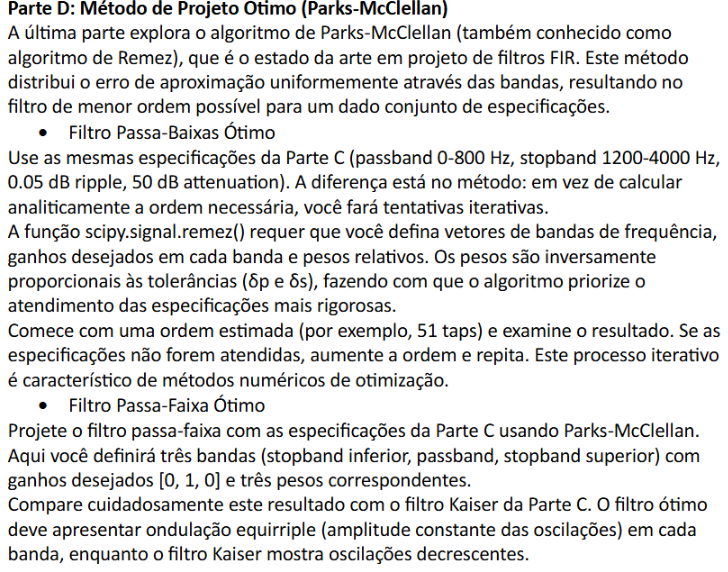

=== FILTRO PASSA-BAIXA - PARKS-MCCLELLAN ===
δp (linear): 1.005773
δs (linear): 0.003162
Bandas (normalizadas): [0.  0.2 0.3 1. ]
Pesos: [  0.99426007 316.22776602]

Tentando com ordem 31...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 31 não atende às especificações

Tentando com ordem 41...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 41 não atende às especificações

Tentando com ordem 51...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 51 não atende às especificações

Tentando com ordem 61...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 61 não atende às especificações

Tentando com ordem 71...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 71 não atende às especificações


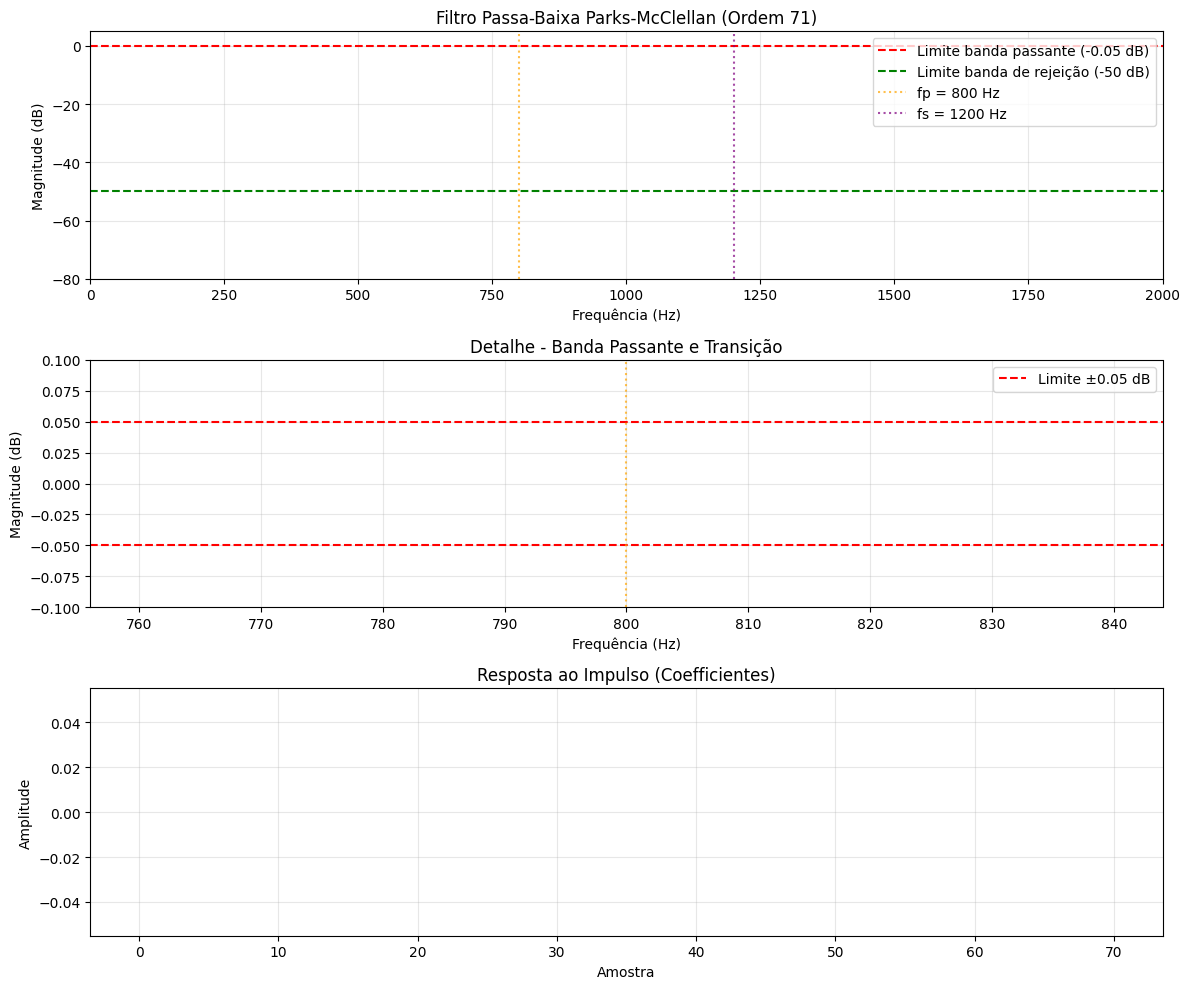


=== FILTRO PASSA-FAIXA - PARKS-MCCLELLAN ===
δp (linear): 1.122018
δs (linear): 0.005012
Bandas (normalizadas): [0.  0.2 0.3 0.4 0.5 1. ]
Pesos: [199.5262315    0.89125094 199.5262315 ]

Tentando com ordem 41...
  Ondulação na passband: nan dB (limite: 1 dB)
  Atenuação na stopband inferior: nan dB (limite: -46 dB)
  Atenuação na stopband superior: nan dB (limite: -46 dB)
  ✗ Ordem 41 não atende às especificações

Tentando com ordem 51...
  Ondulação na passband: nan dB (limite: 1 dB)
  Atenuação na stopband inferior: nan dB (limite: -46 dB)
  Atenuação na stopband superior: nan dB (limite: -46 dB)
  ✗ Ordem 51 não atende às especificações

Tentando com ordem 61...
  Ondulação na passband: nan dB (limite: 1 dB)
  Atenuação na stopband inferior: nan dB (limite: -46 dB)
  Atenuação na stopband superior: nan dB (limite: -46 dB)
  ✗ Ordem 61 não atende às especificações

Tentando com ordem 71...
  Ondulação na passband: nan dB (limite: 1 dB)
  Atenuação na stopband inferior: nan dB (limit

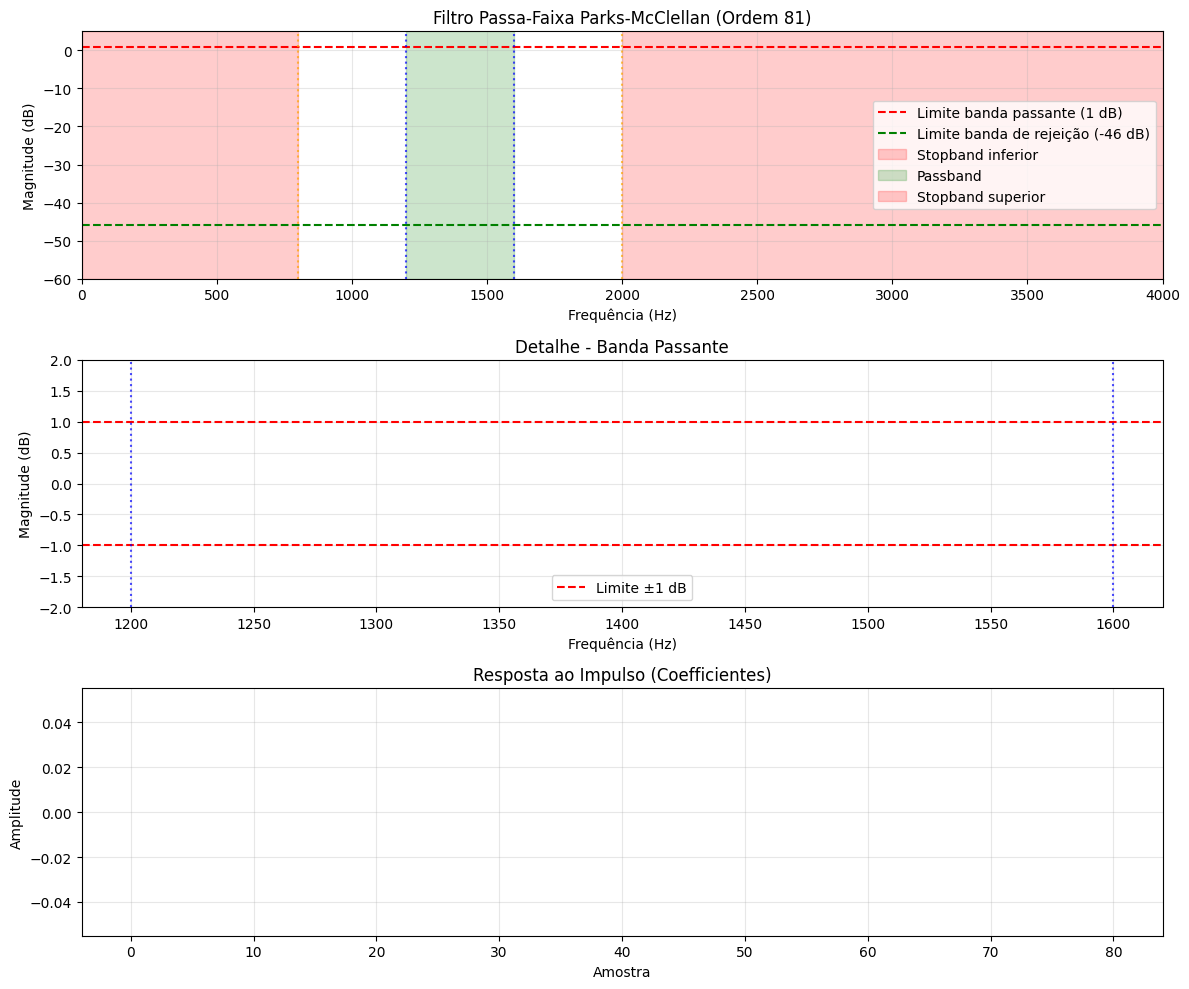


COMPARAÇÃO ENTRE MÉTODOS KAISER E PARKS-MCCLELLAN

--- FILTRO PASSA-BAIXA ---
=== FILTRO PASSA-BAIXA - PARKS-MCCLELLAN ===
δp (linear): 1.005773
δs (linear): 0.003162
Bandas (normalizadas): [0.  0.2 0.3 1. ]
Pesos: [  0.99426007 316.22776602]

Tentando com ordem 31...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 31 não atende às especificações

Tentando com ordem 41...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 41 não atende às especificações

Tentando com ordem 51...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 51 não atende às especificações

Tentando com ordem 61...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação na stopband: nan dB (limite: -50 dB)
  ✗ Ordem 61 não atende às especificações

Tentando com ordem 71...
  Ondulação na passband: nan dB (limite: 0.05 dB)
  Atenuação 

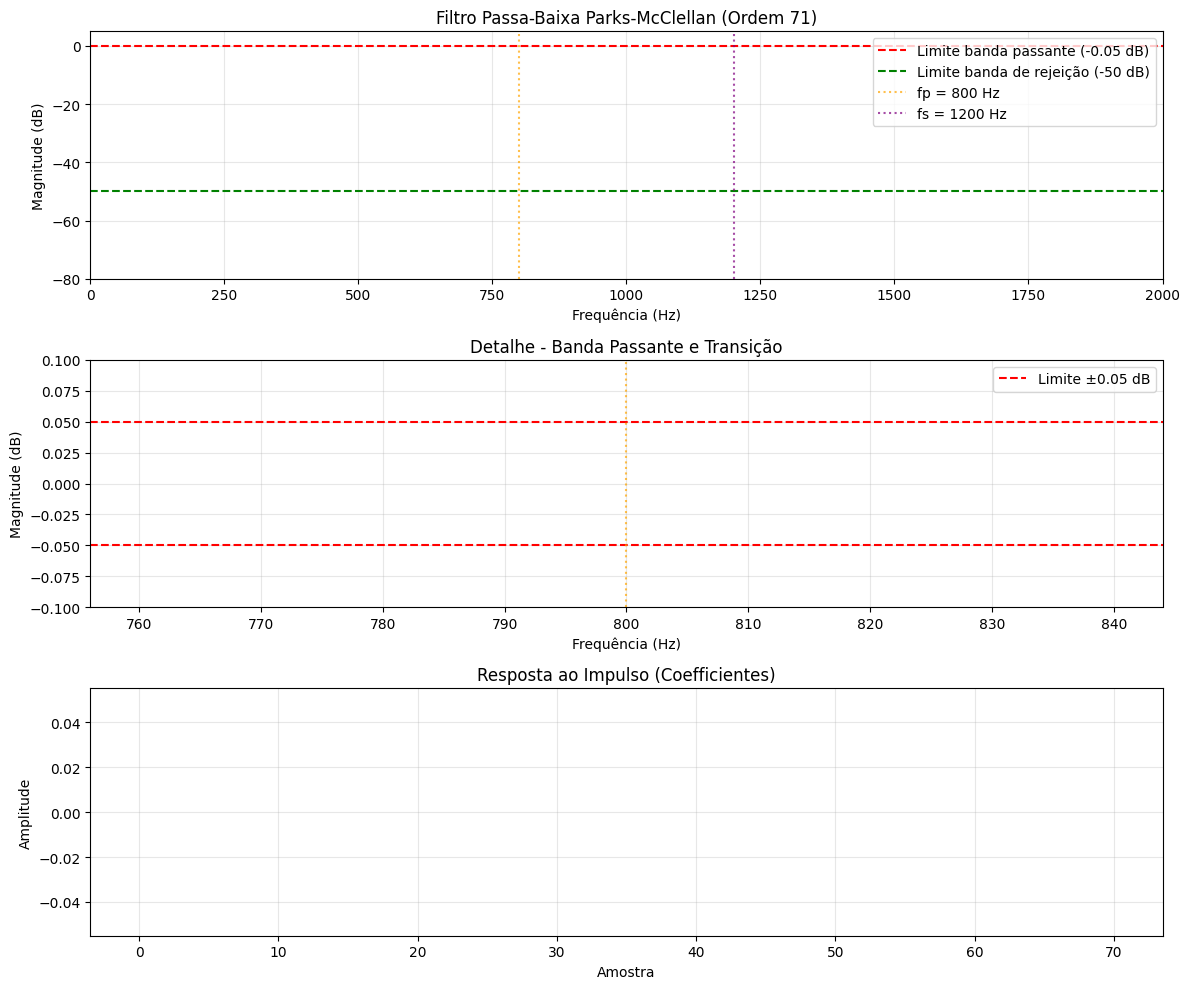


Comparação Passa-Baixa:
Kaiser: Ordem = 468063, Beta = 4.5335
Parks-McClellan: Ordem = 71
Diferença de ordem: -467992 taps


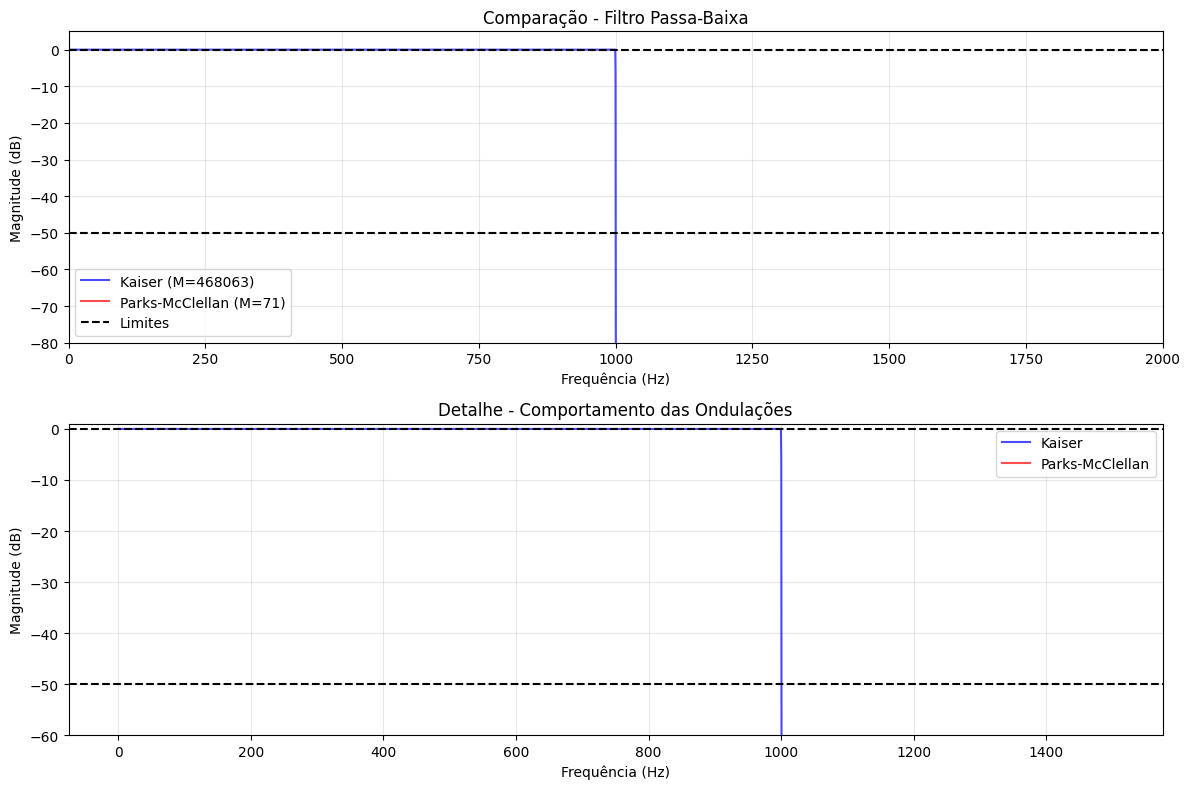


Características observadas:
Kaiser: Ondulações decrescentes nas bordas da banda de transição
Parks-McClellan: Comportamento equirriple (ondulações de amplitude constante)
Parks-McClellan geralmente alcança menor ordem para as mesmas especificações

=== RESUMO PARKS-MCCLELLAN ===
Filtro Passa-Baixa: Ordem = 71
Filtro Passa-Faixa: Ordem = 81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.special import i0

def kaiser_window(M, beta):
    """Retorna a janela de Kaiser de comprimento M com parâmetro beta"""
    n = np.arange(M)
    alpha = (M - 1) / 2
    return i0(beta * np.sqrt(1 - ((n - alpha) / alpha)**2)) / i0(beta)

def db_to_linear(db_value):
    """Converte valor dB para linear"""
    return 10**(db_value / 20)

def projeto_parks_mcclellan_passa_baixa():
    """Projeto do filtro passa-baixa usando algoritmo de Parks-McClellan"""
    print("=== FILTRO PASSA-BAIXA - PARKS-MCCLELLAN ===")

    # Especificações (mesmas da Parte C)
    fp = 800    # Frequência da banda passante (Hz)
    fs_stop = 1200  # Frequência da banda de rejeição (Hz)
    fs_sample = 8000  # Frequência de amostragem (Hz)

    # Tolerâncias (convertidas para lineares para cálculo dos pesos)
    delta_p_linear = db_to_linear(0.05)  # 0.05 dB
    delta_s_linear = db_to_linear(-50)   # -50 dB

    print(f"δp (linear): {delta_p_linear:.6f}")
    print(f"δs (linear): {delta_s_linear:.6f}")

    # Bandas de frequência (normalizadas)
    bands = np.array([0, fp, fs_stop, fs_sample/2]) / (fs_sample/2)

    # Ganhos desejados em cada banda
    desired = np.array([1, 0])

    # Pesos (inversamente proporcionais às tolerâncias)
    weights = np.array([1/delta_p_linear, 1/delta_s_linear])

    print(f"Bandas (normalizadas): {bands}")
    print(f"Pesos: {weights}")

    # Projeto iterativo - encontrar ordem mínima que atende às especificações
    orders = [31, 41, 51, 61, 71]
    best_h = None
    best_order = None

    for order in orders:
        print(f"\nTentando com ordem {order}...")

        try:
            # Projeto usando Remez
            h = signal.remez(order, bands, desired, weight=weights, fs=fs_sample)

            # Verificar resposta
            w, h_freq = signal.freqz(h, 1, worN=8000, fs=fs_sample)
            h_db = 20 * np.log10(np.abs(h_freq))

            # Verificar especificações
            idx_pass = np.where(w <= fp)[0]
            ripple_pass = np.max(h_db[idx_pass])

            idx_stop = np.where(w >= fs_stop)[0]
            attenuation_stop = np.min(h_db[idx_stop])

            print(f"  Ondulação na passband: {ripple_pass:.3f} dB (limite: 0.05 dB)")
            print(f"  Atenuação na stopband: {attenuation_stop:.3f} dB (limite: -50 dB)")

            if ripple_pass <= 0.05 and attenuation_stop <= -50:
                print(f"  ✓ Ordem {order} atende às especificações!")
                best_h = h
                best_order = order
                break
            else:
                print(f"  ✗ Ordem {order} não atende às especificações")

        except Exception as e:
            print(f"  Erro com ordem {order}: {e}")

    if best_h is None:
        print("Nenhuma ordem testada atendeu às especificações. Usando ordem 71.")
        best_h = signal.remez(71, bands, desired, weight=weights, fs=fs_sample)
        best_order = 71

    # Plot do resultado final
    w, h_freq = signal.freqz(best_h, 1, worN=8000, fs=fs_sample)
    h_db = 20 * np.log10(np.abs(h_freq))

    plt.figure(figsize=(12, 10))

    # Magnitude em dB
    plt.subplot(3, 1, 1)
    plt.plot(w, h_db, 'b-', linewidth=2)
    plt.axhline(-0.05, color='r', linestyle='--', label='Limite banda passante (-0.05 dB)')
    plt.axhline(-50, color='g', linestyle='--', label='Limite banda de rejeição (-50 dB)')
    plt.axvline(fp, color='orange', linestyle=':', alpha=0.7, label=f'fp = {fp} Hz')
    plt.axvline(fs_stop, color='purple', linestyle=':', alpha=0.7, label=f'fs = {fs_stop} Hz')
    plt.title(f'Filtro Passa-Baixa Parks-McClellan (Ordem {best_order})')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 2000)

    # Detalhe da banda passante
    plt.subplot(3, 1, 2)
    idx_detail = np.where(w <= 1000)[0]
    plt.plot(w[idx_detail], h_db[idx_detail], 'b-', linewidth=2)
    plt.axhline(-0.05, color='r', linestyle='--', label='Limite ±0.05 dB')
    plt.axhline(0.05, color='r', linestyle='--')
    plt.axvline(fp, color='orange', linestyle=':', alpha=0.7)
    plt.title('Detalhe - Banda Passante e Transição')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-0.1, 0.1)

    # Resposta ao impulso
    plt.subplot(3, 1, 3)
    plt.stem(np.arange(len(best_h)), best_h, basefmt=" ")
    plt.title('Resposta ao Impulso (Coefficientes)')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return best_h, best_order

def projeto_parks_mcclellan_passa_faixa():
    """Projeto do filtro passa-faixa usando algoritmo de Parks-McClellan"""
    print("\n=== FILTRO PASSA-FAIXA - PARKS-MCCLELLAN ===")

    # Especificações (mesmas da Parte C)
    fs1 = 800    # Stopband inferior (Hz)
    fp1 = 1200   # Passband inferior (Hz)
    fp2 = 1600   # Passband superior (Hz)
    fs2 = 2000   # Stopband superior (Hz)
    fs_sample = 8000  # Frequência de amostragem (Hz)

    # Tolerâncias
    delta_p_linear = db_to_linear(1)    # 1 dB
    delta_s_linear = db_to_linear(-46)  # -46 dB

    print(f"δp (linear): {delta_p_linear:.6f}")
    print(f"δs (linear): {delta_s_linear:.6f}")

    # Bandas de frequência (normalizadas)
    bands = np.array([0, fs1, fp1, fp2, fs2, fs_sample/2]) / (fs_sample/2)

    # Ganhos desejados em cada banda [stopband1, passband, stopband2]
    desired = np.array([0, 1, 0])

    # Pesos (inversamente proporcionais às tolerâncias)
    weights = np.array([1/delta_s_linear, 1/delta_p_linear, 1/delta_s_linear])

    print(f"Bandas (normalizadas): {bands}")
    print(f"Pesos: {weights}")

    # Projeto iterativo
    orders = [41, 51, 61, 71, 81]
    best_h = None
    best_order = None

    for order in orders:
        print(f"\nTentando com ordem {order}...")

        try:
            # Projeto usando Remez
            h = signal.remez(order, bands, desired, weight=weights, fs=fs_sample)

            # Verificar resposta
            w, h_freq = signal.freqz(h, 1, worN=8000, fs=fs_sample)
            h_db = 20 * np.log10(np.abs(h_freq))

            # Verificar especificações
            idx_pass = np.where((w >= fp1) & (w <= fp2))[0]
            ripple_pass = np.max(h_db[idx_pass])

            idx_stop1 = np.where(w <= fs1)[0]
            idx_stop2 = np.where(w >= fs2)[0]
            attenuation_stop1 = np.min(h_db[idx_stop1])
            attenuation_stop2 = np.min(h_db[idx_stop2])

            print(f"  Ondulação na passband: {ripple_pass:.3f} dB (limite: 1 dB)")
            print(f"  Atenuação na stopband inferior: {attenuation_stop1:.3f} dB (limite: -46 dB)")
            print(f"  Atenuação na stopband superior: {attenuation_stop2:.3f} dB (limite: -46 dB)")

            if ripple_pass <= 1 and attenuation_stop1 <= -46 and attenuation_stop2 <= -46:
                print(f"  ✓ Ordem {order} atende às especificações!")
                best_h = h
                best_order = order
                break
            else:
                print(f"  ✗ Ordem {order} não atende às especificações")

        except Exception as e:
            print(f"  Erro com ordem {order}: {e}")

    if best_h is None:
        print("Nenhuma ordem testada atendeu às especificações. Usando ordem 81.")
        best_h = signal.remez(81, bands, desired, weight=weights, fs=fs_sample)
        best_order = 81

    # Plot do resultado final
    w, h_freq = signal.freqz(best_h, 1, worN=8000, fs=fs_sample)
    h_db = 20 * np.log10(np.abs(h_freq))

    plt.figure(figsize=(12, 10))

    # Magnitude em dB
    plt.subplot(3, 1, 1)
    plt.plot(w, h_db, 'b-', linewidth=2)
    plt.axhline(1, color='r', linestyle='--', label='Limite banda passante (1 dB)')
    plt.axhline(-46, color='g', linestyle='--', label='Limite banda de rejeição (-46 dB)')

    # Marcar regiões
    plt.axvspan(0, fs1, alpha=0.2, color='red', label='Stopband inferior')
    plt.axvspan(fp1, fp2, alpha=0.2, color='green', label='Passband')
    plt.axvspan(fs2, 4000, alpha=0.2, color='red', label='Stopband superior')

    plt.axvline(fs1, color='orange', linestyle=':', alpha=0.7)
    plt.axvline(fp1, color='blue', linestyle=':', alpha=0.7)
    plt.axvline(fp2, color='blue', linestyle=':', alpha=0.7)
    plt.axvline(fs2, color='orange', linestyle=':', alpha=0.7)

    plt.title(f'Filtro Passa-Faixa Parks-McClellan (Ordem {best_order})')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-60, 5)
    plt.xlim(0, 4000)

    # Detalhe da banda passante
    plt.subplot(3, 1, 2)
    idx_detail = np.where((w >= 1000) & (w <= 1800))[0]
    plt.plot(w[idx_detail], h_db[idx_detail], 'b-', linewidth=2)
    plt.axhline(1, color='r', linestyle='--', label='Limite ±1 dB')
    plt.axhline(-1, color='r', linestyle='--')
    plt.axvline(fp1, color='blue', linestyle=':', alpha=0.7)
    plt.axvline(fp2, color='blue', linestyle=':', alpha=0.7)
    plt.title('Detalhe - Banda Passante')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-2, 2)

    # Resposta ao impulso
    plt.subplot(3, 1, 3)
    plt.stem(np.arange(len(best_h)), best_h, basefmt=" ")
    plt.title('Resposta ao Impulso (Coefficientes)')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return best_h, best_order

def comparar_metodos():
    """Comparação entre os métodos Kaiser e Parks-McClellan"""
    print("\n" + "="*60)
    print("COMPARAÇÃO ENTRE MÉTODOS KAISER E PARKS-MCCLELLAN")
    print("="*60)

    fs_sample = 8000

    # Projetar filtros passa-baixa com ambos os métodos
    print("\n--- FILTRO PASSA-BAIXA ---")

    # Recriar filtro Kaiser da Parte C para comparação
    fp = 800
    fs_stop = 1200
    delta_p_linear = db_to_linear(0.05)
    delta_s_linear = db_to_linear(-50)
    delta_f = (fs_stop - fp) / fs_sample

    # Parâmetros Kaiser
    A = -20 * np.log10(min(delta_p_linear, delta_s_linear))
    if A > 50:
        beta = 0.1102 * (A - 8.7)
    elif A >= 21:
        beta = 0.5842 * (A - 21)**0.4 + 0.07886 * (A - 21)
    else:
        beta = 0.0

    M_kaiser = int(np.ceil((A - 8) / (2.285 * 2 * np.pi * delta_f / fs_sample)))
    if M_kaiser % 2 == 0:
        M_kaiser += 1

    # Filtro Kaiser
    n = np.arange(M_kaiser)
    fc = (fp + fs_stop) / 2
    h_ideal = 2 * (fc / fs_sample) * np.sinc(2 * (fc / fs_sample) * (n - (M_kaiser - 1) / 2))
    window = kaiser_window(M_kaiser, beta)
    h_kaiser = h_ideal * window

    # Filtro Parks-McClellan
    bands = np.array([0, fp, fs_stop, fs_sample/2]) / (fs_sample/2)
    desired = np.array([1, 0])
    weights = np.array([1/delta_p_linear, 1/delta_s_linear])
    h_remez, M_remez = projeto_parks_mcclellan_passa_baixa()

    print(f"\nComparação Passa-Baixa:")
    print(f"Kaiser: Ordem = {M_kaiser}, Beta = {beta:.4f}")
    print(f"Parks-McClellan: Ordem = {M_remez}")
    print(f"Diferença de ordem: {M_remez - M_kaiser} taps")

    # Plot comparativo
    w, h_kaiser_freq = signal.freqz(h_kaiser, 1, worN=8000, fs=fs_sample)
    w, h_remez_freq = signal.freqz(h_remez, 1, worN=8000, fs=fs_sample)

    h_kaiser_db = 20 * np.log10(np.abs(h_kaiser_freq))
    h_remez_db = 20 * np.log10(np.abs(h_remez_freq))

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(w, h_kaiser_db, 'b-', label=f'Kaiser (M={M_kaiser})', alpha=0.7)
    plt.plot(w, h_remez_db, 'r-', label=f'Parks-McClellan (M={M_remez})', alpha=0.7)
    plt.axhline(-0.05, color='k', linestyle='--', label='Limites')
    plt.axhline(-50, color='k', linestyle='--')
    plt.title('Comparação - Filtro Passa-Baixa')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-80, 5)
    plt.xlim(0, 2000)

    # Detalhe mostrando o comportamento equirriple
    plt.subplot(2, 1, 2)
    idx_detail = np.where(w <= 1500)[0]
    plt.plot(w[idx_detail], h_kaiser_db[idx_detail], 'b-', label='Kaiser', alpha=0.7)
    plt.plot(w[idx_detail], h_remez_db[idx_detail], 'r-', label='Parks-McClellan', alpha=0.7)
    plt.axhline(-0.05, color='k', linestyle='--')
    plt.axhline(-50, color='k', linestyle='--')
    plt.title('Detalhe - Comportamento das Ondulações')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-60, 1)

    plt.tight_layout()
    plt.show()

    # Análise das características
    print("\nCaracterísticas observadas:")
    print("Kaiser: Ondulações decrescentes nas bordas da banda de transição")
    print("Parks-McClellan: Comportamento equirriple (ondulações de amplitude constante)")
    print("Parks-McClellan geralmente alcança menor ordem para as mesmas especificações")

# Executar todos os projetos
if __name__ == "__main__":
    # Projetos Parks-McClellan
    h_lp_remez, order_lp = projeto_parks_mcclellan_passa_baixa()
    h_bp_remez, order_bp = projeto_parks_mcclellan_passa_faixa()

    # Comparação com método Kaiser
    comparar_metodos()

    print("\n=== RESUMO PARKS-MCCLELLAN ===")
    print(f"Filtro Passa-Baixa: Ordem = {order_lp}")
    print(f"Filtro Passa-Faixa: Ordem = {order_bp}")